In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!unzip -uq "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1.zip" -d "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/"

In [ ]:
# example of progressively loading images from file
from keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(validation_split=0.2)
img_height = 224
img_width = 224 
batch_size = 128
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1',target_size=(img_height, img_width),batch_size = batch_size, subset='training')
val_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1',target_size=(img_height, img_width), batch_size = batch_size, subset='validation')

Found 10656 images belonging to 37 classes.
Found 2664 images belonging to 37 classes.


In [ ]:
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(32, 224, 224, 3), min=5.000, max=251.000


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_it, test_size=0.2, random_state=42)

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.applications import inception_v3
# Init the VGG model
vgg_conv = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_height, 3))

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

In [ ]:
from keras.models import Sequential, Model
#from tensorflow.keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Embedding, Dense, Dropout, Flatten, Input,GlobalAveragePooling2D
from keras import activations
#from tensorflow.python.keras.layers.core import Dense, Dropout, Flatten
#from tensorflow.python.keras.layers import Input
from keras.optimizers import Adam, SGD
from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications import vgg16
from skimage.color import gray2rgb
#from tensorflow.keras.applications.inception_v3 import InceptionV3 
#from tensorflow.keras.applications import DenseNet201

In [ ]:
# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
#model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(37, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 37)                1894437   
Total params: 23,697,221
Trainable params: 1,894,437
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
train_it.samples

10656

In [ ]:
import keras
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=2000,
    decay_rate=0.16,
    staircase=True)
#sgd = keras.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
              metrics=['acc'])

In [ ]:
nb_epochs = 70
batch_size = 128
model.fit_generator(
    train_it,
    steps_per_epoch = train_it.samples // batch_size,
    validation_data = val_it, 
    validation_steps = val_it.samples // batch_size,
    epochs = nb_epochs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/70
83/83 [==============================] - 35s 423ms/step - loss: 2163.6301 - acc: 0.5774 - val_loss: 1542.7670 - val_acc: 0.6117
Epoch 2/70
83/83 [==============================] - 35s 416ms/step - loss: 2163.6646 - acc: 0.5768 - val_loss: 1511.5114 - val_acc: 0.6145
Epoch 3/70
83/83 [==============================] - 35s 420ms/step - loss: 2144.5874 - acc: 0.5793 - val_loss: 1518.1799 - val_acc: 0.6102
Epoch 4/70
83/83 [==============================] - 35s 417ms/step - loss: 2133.4614 - acc: 0.5799 - val_loss: 1492.7726 - val_acc: 0.6152
Epoch 5/70
83/83 [==============================] - 34s 415ms/step - loss: 2120.4504 - acc: 0.5824 - val_loss: 1466.7646 - val_acc: 0.6137
Epoch 6/70
83/83 [==============================] - 35s 419ms/step - loss: 2110.6160 - acc: 0.5815 - val_loss: 1484.1321 - val_acc: 0.6117
Epoch 7/70
83/83 [==============================] - 34s 414ms/step - loss: 2092.5627 - acc: 0.5824 - val_loss: 1466.1635 - val_acc: 0.6168
Epoch 8/70
83/83 [=========

In [ ]:
model.save("/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1/Dataset_1_inception")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1/Dataset_1_inception/assets


In [ ]:
val_it.classes

array([ 0,  0,  0, ..., 36, 36, 36], dtype=int32)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
num_of_test_samples = val_it.samples
batch_size = 128
Y_pred = model.predict(val_it)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_it.classes, y_pred))
print('Classification Report')
target_names = ['1', '10', '11', '12', '13', '14', '15', '16', '17',  '18', '19', '2', '20', '21',  '22',  '23',  '24',  '25',  '26',  '27','28', '29', '3', '30', '31', '32', '33', '34','35', '36', '38', '4', '5', '6', '7', '8', '9']
print(classification_report(val_it.classes, y_pred, target_names=target_names))

Confusion Matrix
[[0 3 1 ... 1 1 3]
 [0 3 1 ... 4 2 4]
 [0 3 1 ... 2 2 2]
 ...
 [4 3 3 ... 2 2 0]
 [0 3 4 ... 2 4 1]
 [2 3 2 ... 0 3 2]]
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        72
          10       0.04      0.04      0.04        72
          11       0.01      0.01      0.01        72
          12       0.03      0.03      0.03        72
          13       0.00      0.00      0.00        72
          14       0.03      0.03      0.03        72
          15       0.01      0.01      0.01        72
          16       0.03      0.03      0.03        72
          17       0.03      0.03      0.03        72
          18       0.06      0.06      0.06        72
          19       0.06      0.06      0.06        72
           2       0.07      0.07      0.07        72
          20       0.04      0.04      0.04        72
          21       0.03      0.03      0.03        72
          22       0.06      0

In [ ]:
val_it.classes

array([ 0,  0,  0, ..., 36, 36, 36], dtype=int32)

In [ ]:
batch_size = 2664
# prepare an iterators for each dataset
#train_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1',target_size=(img_height, img_width),batch_size = batch_size, subset='training')
val_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1',target_size=(img_height, img_width), batch_size = batch_size, subset='validation')

Found 2664 images belonging to 37 classes.


In [ ]:
from tensorflow import keras
model = keras.models.load_model("/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/Dataset_1_inception")

In [ ]:
test_score = model.evaluate_generator(val_it, batch_size)



print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


ResourceExhaustedError: ignored

In [ ]:
import sys

import numpy as np

from keras import backend as K

from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix

from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input

import matplotlib.pyplot as plt

from keras.optimizers import Adam

import itertools 

In [ ]:
# Loss Curves

plt.figure(figsize=[8,6])

plt.plot(history.history['loss'],'r',linewidth=3.0)

plt.plot(history.history['val_loss'],'b',linewidth=3.0)

plt.legend(['Training loss', 'Validation Loss'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Loss',fontsize=16)

plt.title('Loss Curves',fontsize=16)

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False



def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [ ]:
#Print the Target names



target_names = []

for key in val_it.class_indices:

    target_names.append(key)



print(target_names)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '38', '4', '5', '6', '7', '8', '9']


In [ ]:
y_img_batch, y_class_batch = val_it[0]
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print(sum(y_pred==y_true)/batch_size)

0.6107357357357357


Normalized confusion matrix


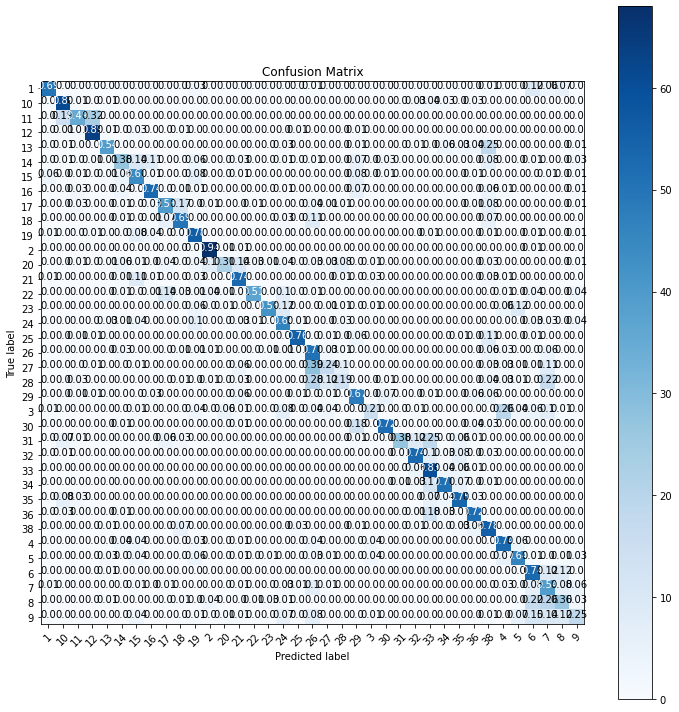

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_true,y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
#Print Classification Report

print('Classification Report')

print(classification_report(y_true, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.69      0.77        72
           1       0.66      0.85      0.74        72
           2       0.70      0.49      0.57        72
           3       0.70      0.89      0.78        72
           4       0.76      0.54      0.63        72
           5       0.54      0.38      0.44        72
           6       0.51      0.61      0.56        72
           7       0.74      0.74      0.74        72
           8       0.63      0.56      0.59        72
           9       0.65      0.69      0.67        72
          10       0.57      0.78      0.66        72
          11       0.81      0.94      0.87        72
          12       0.73      0.31      0.43        72
          13       0.62      0.74      0.67        72
          14       0.88      0.51      0.65        72
          15       0.89      0.58      0.71        72
          16       0.53      0.64      0.58        72
     